# Importar bibliotecas necesarias
Importar las bibliotecas necesarias, incluyendo pandas, numpy, matplotlib y seaborn.

In [8]:
pip install --upgrade seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 4.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Cargar y explorar el conjunto de datos
Cargar el conjunto de datos de Amazon UK y realizar una exploración inicial para entender su estructura y contenido.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


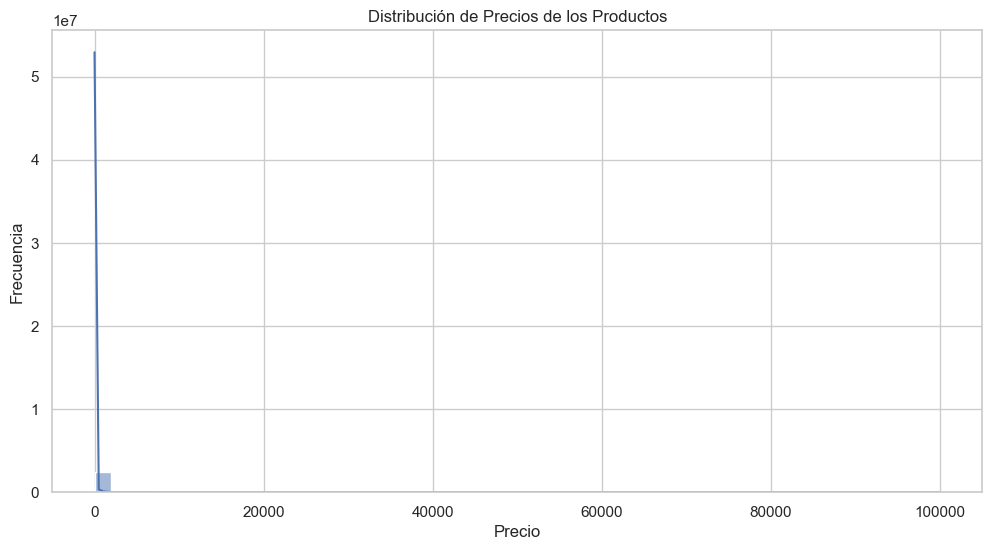

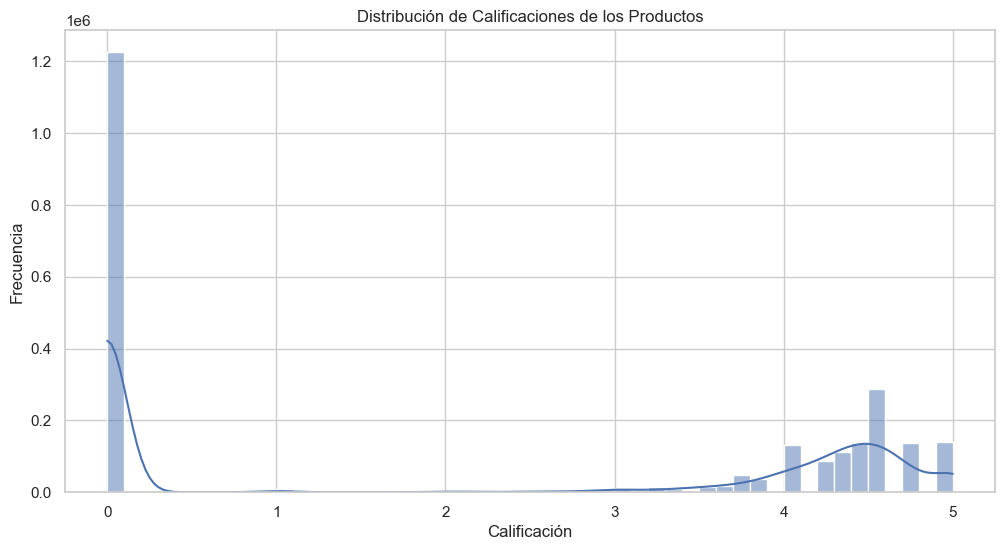

In [2]:
# Cargar y explorar el conjunto de datos

import pandas as pd

# Cargar el conjunto de datos de Amazon UK desde un archivo local
file_path = 'amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas del conjunto de datos
df.head()

# Mostrar información general del conjunto de datos
df.info()

# Describir las estadísticas básicas del conjunto de datos
df.describe()

# Verificar si hay valores nulos en el conjunto de datos
df.isnull().sum()

# Visualizar la distribución de precios de los productos
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución de Precios de los Productos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución de calificaciones de los productos
plt.figure(figsize=(12, 6))
sns.histplot(df['stars'], bins=50, kde=True)
plt.title('Distribución de Calificaciones de los Productos')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de tablas cruzadas
Crear una tabla cruzada entre la categoría del producto y el estado de 'isBestSeller'. Calcular la proporción de más vendidos para cada categoría y ordenar las categorías en orden descendente.

In [6]:
# Crear una tabla cruzada entre la categoría del producto y el estado de más vendido
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Asegurarse de que las columnas 0 y 1 existan en la tabla cruzada
if 0 in crosstab.columns and 1 in crosstab.columns:
    # Calcular la proporción de más vendidos para cada categoría
    crosstab['proportion'] = crosstab[1] / (crosstab[0] + crosstab[1])
else:
    # Si alguna de las columnas no existe, establecer la proporción en 0
    crosstab['proportion'] = 0

# Ordenar las categorías en orden descendente según la proporción de más vendidos
crosstab_sorted = crosstab.sort_values(by='proportion', ascending=False)

print(crosstab_sorted)

isBestSeller                            False  True  proportion
category                                                       
3D Printers                               247     1           0
Motorbike Lighting                       5207     3           0
Motorbike Handlebars, Controls & Grips   8092     1           0
Motorbike Exhaust & Exhaust Systems       257     1           0
Motorbike Engines & Engine Parts          227     1           0
...                                       ...   ...         ...
Garden Décor                             9447    45           0
Games & Game Accessories                 9357    39           0
GPS, Finders & Accessories               9331    18           0
Furniture & Lighting                     9145    27           0
eBook Readers & Accessories               246     0           0

[296 rows x 3 columns]


# Pruebas estadísticas
Realizar una prueba de Chi-cuadrado para determinar si la distribución de los más vendidos es independiente de la categoría del producto. Calcular el V de Cramér para entender la fuerza de la asociación entre el estado de más vendido y la categoría.

In [8]:
# Pruebas estadísticas

# Realizar una prueba de Chi-cuadrado para determinar si la distribución de los más vendidos es independiente de la categoría del producto
from scipy.stats import chi2_contingency

# Crear la tabla de contingencia
contingency_table = pd.crosstab(df['category'], df['isBestSeller'])

# Realizar la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Mostrar los resultados de la prueba de Chi-cuadrado
print(f"Chi-cuadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Grados de libertad: {dof}")

# Calcular el V de Cramér para entender la fuerza de la asociación entre el estado de más vendido y la categoría
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Mostrar el V de Cramér
print(f"V de Cramér: {cramers_v}")

Chi-cuadrado: 36540.20270061387
p-valor: 0.0
Grados de libertad: 295
V de Cramér: 0.1222829439760564


# Visualizaciones
Visualizar la relación entre las categorías de productos y el estado de más vendido utilizando un gráfico de barras apiladas.

<Figure size 1400x800 with 0 Axes>

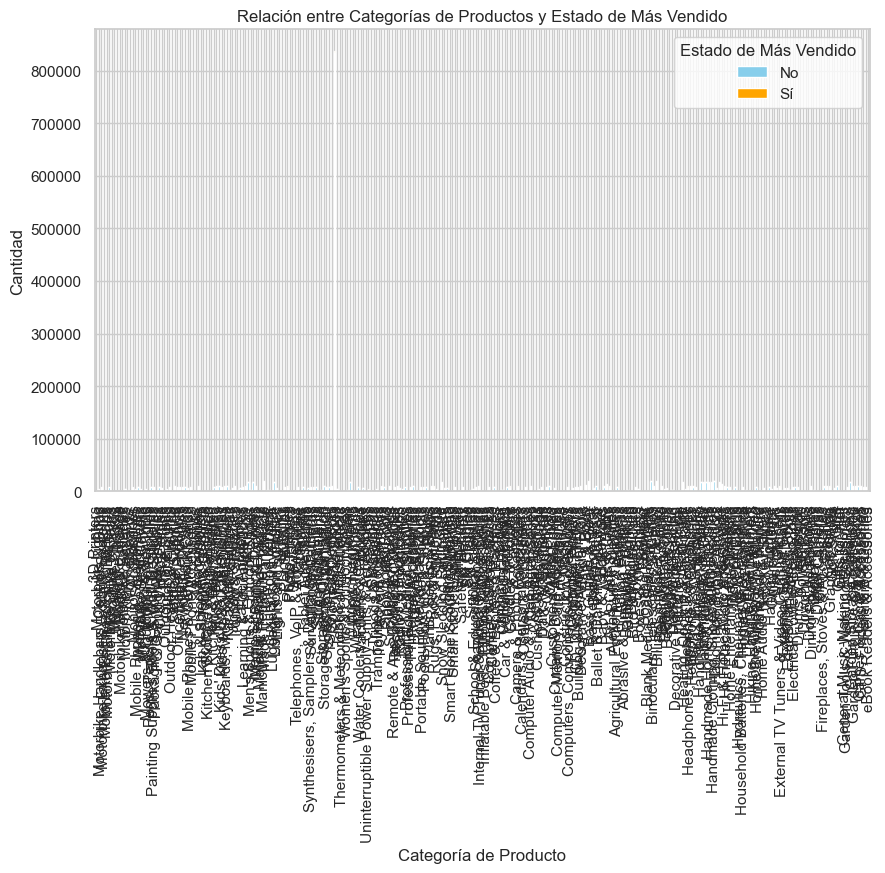

In [9]:
# Visualizaciones

# Visualizar la relación entre las categorías de productos y el estado de más vendido utilizando un gráfico de barras apiladas
plt.figure(figsize=(14, 8))
crosstab_sorted.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Relación entre Categorías de Productos y Estado de Más Vendido')
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad')
plt.legend(title='Estado de Más Vendido', labels=['No', 'Sí'])
plt.xticks(rotation=90)
plt.show()

# Paso preliminar: Eliminar valores atípicos en los precios de los productos
Eliminar los valores atípicos en los precios de los productos utilizando el método del rango intercuartílico (IQR).

<class 'pandas.core.frame.DataFrame'>
Index: 2115963 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 147.3+ MB


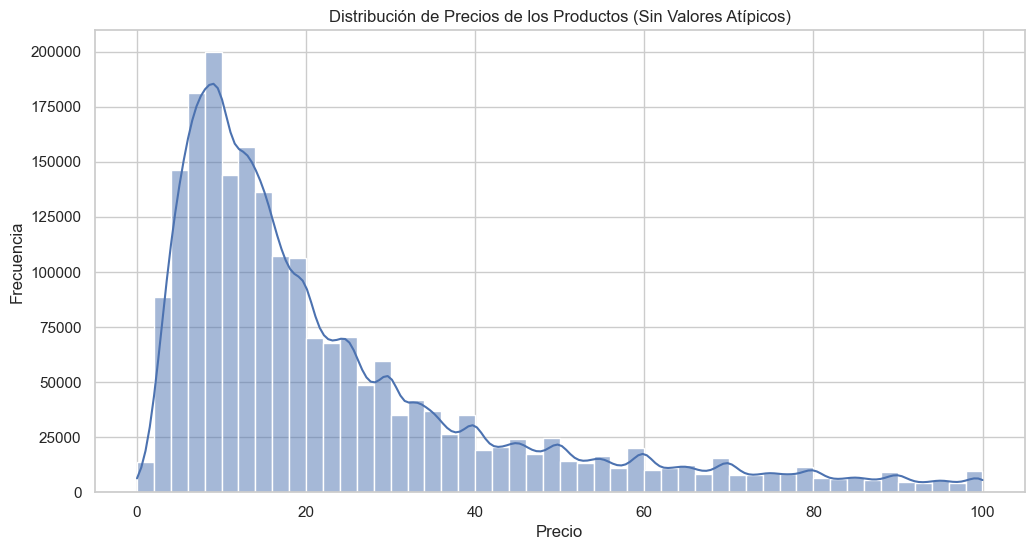

In [10]:
# Paso preliminar: Eliminar valores atípicos en los precios de los productos

# Calcular el rango intercuartílico (IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores atípicos del conjunto de datos
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Mostrar información general del conjunto de datos filtrado
df_filtered.info()

# Describir las estadísticas básicas del conjunto de datos filtrado
df_filtered.describe()

# Visualizar la distribución de precios de los productos después de eliminar los valores atípicos
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['price'], bins=50, kde=True)
plt.title('Distribución de Precios de los Productos (Sin Valores Atípicos)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

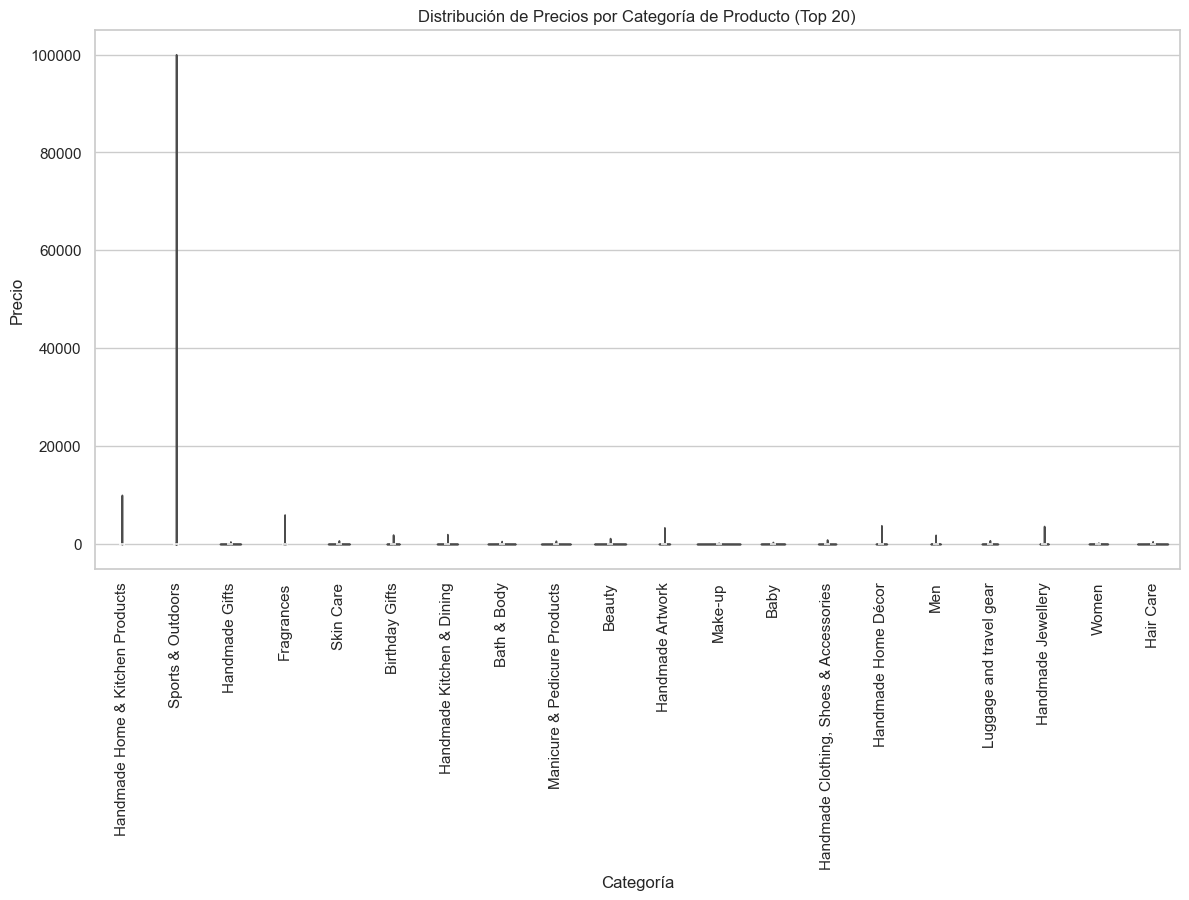

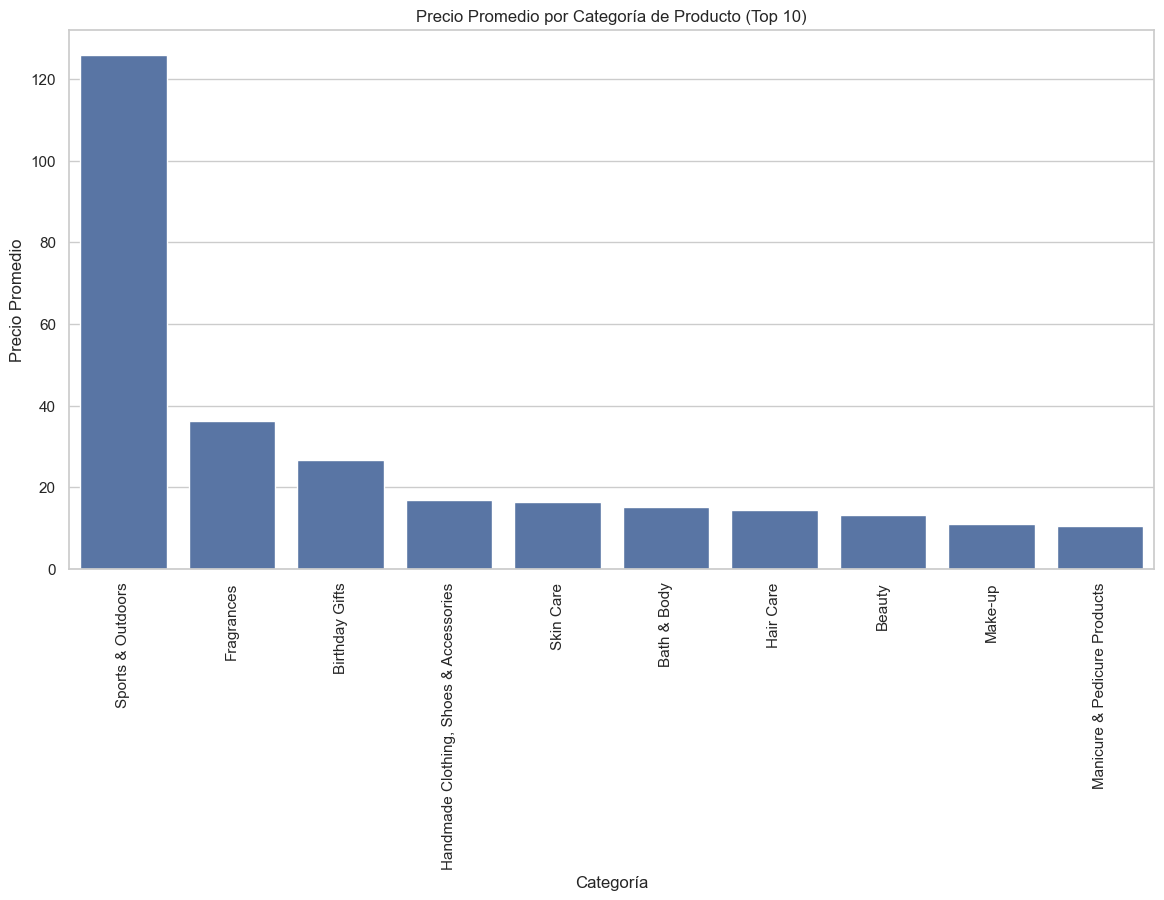

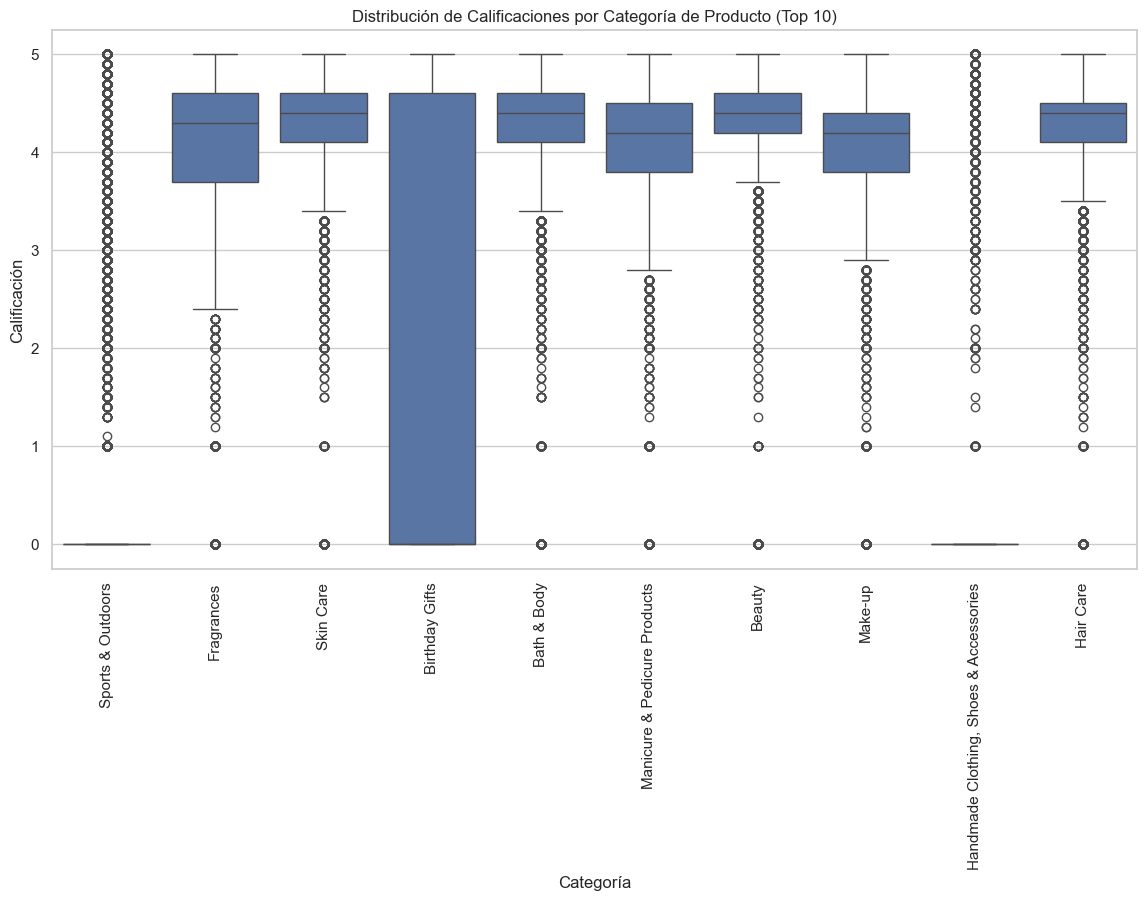

In [11]:
# Parte 2: Explorando precios y calificaciones de productos en categorías y marcas

# Gráficos de violín
top_20_categories = df['category'].value_counts().nlargest(20).index
plt.figure(figsize=(14, 7))
sns.violinplot(x='category', y='price', data=df[df['category'].isin(top_20_categories)])
plt.xticks(rotation=90)
plt.title('Distribución de Precios por Categoría de Producto (Top 20)')
plt.xlabel('Categoría')
plt.ylabel('Precio')
plt.show()

# Gráficos de barras
top_10_categories = df['category'].value_counts().nlargest(10).index
avg_price_per_category = df[df['category'].isin(top_10_categories)].groupby('category')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 7))
sns.barplot(x=avg_price_per_category.index, y=avg_price_per_category.values)
plt.xticks(rotation=90)
plt.title('Precio Promedio por Categoría de Producto (Top 10)')
plt.xlabel('Categoría')
plt.ylabel('Precio Promedio')
plt.show()

# Diagramas de caja
plt.figure(figsize=(14, 7))
sns.boxplot(x='category', y='stars', data=df[df['category'].isin(top_10_categories)])
plt.xticks(rotation=90)
plt.title('Distribución de Calificaciones por Categoría de Producto (Top 10)')
plt.xlabel('Categoría')
plt.ylabel('Calificación')
plt.show()


Coeficiente de correlación entre precio y calificación: -0.1249067326214861


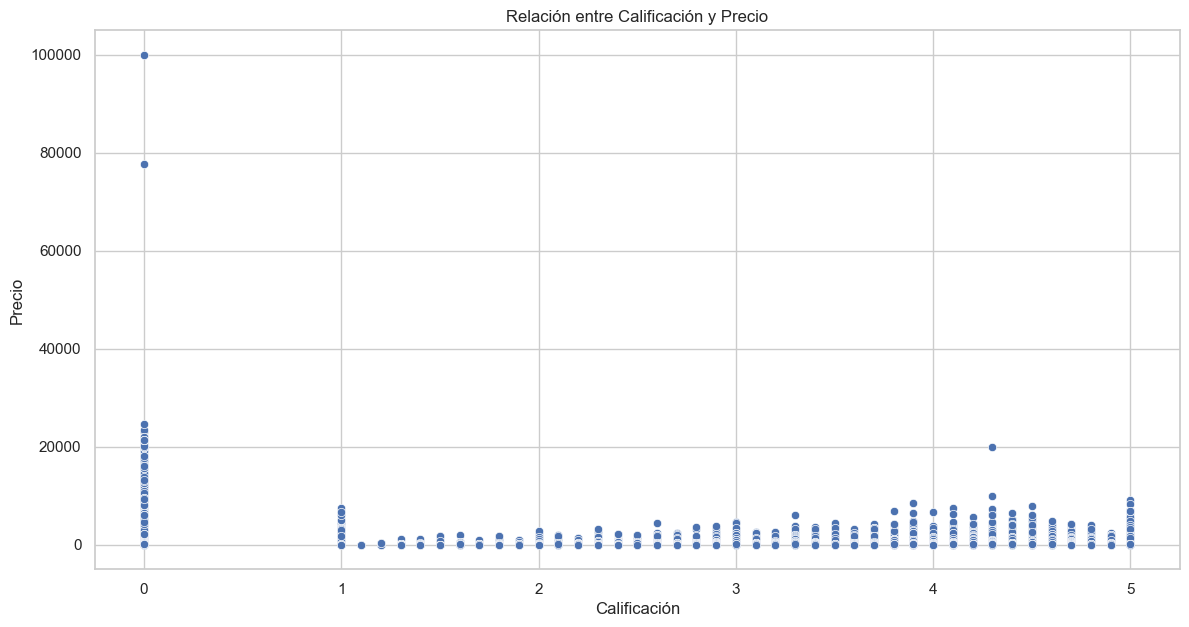

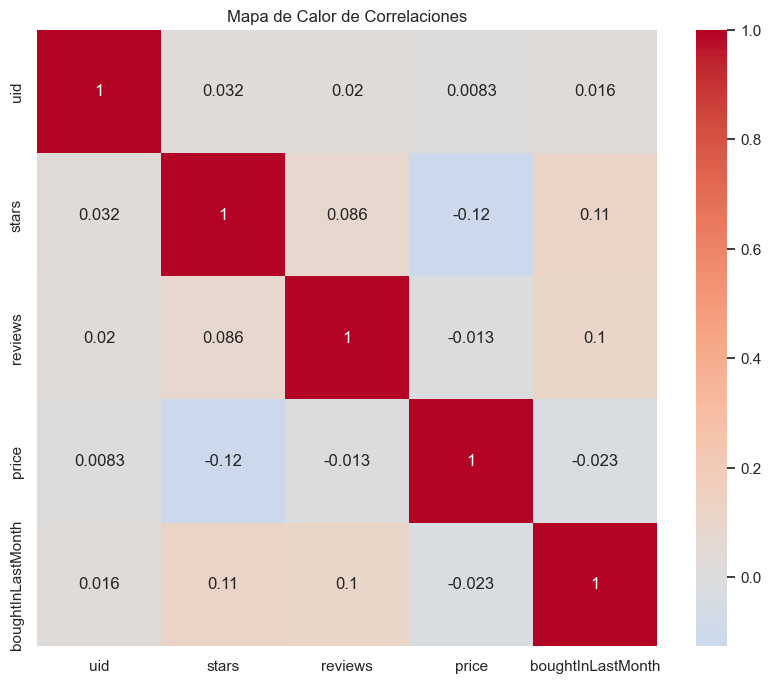

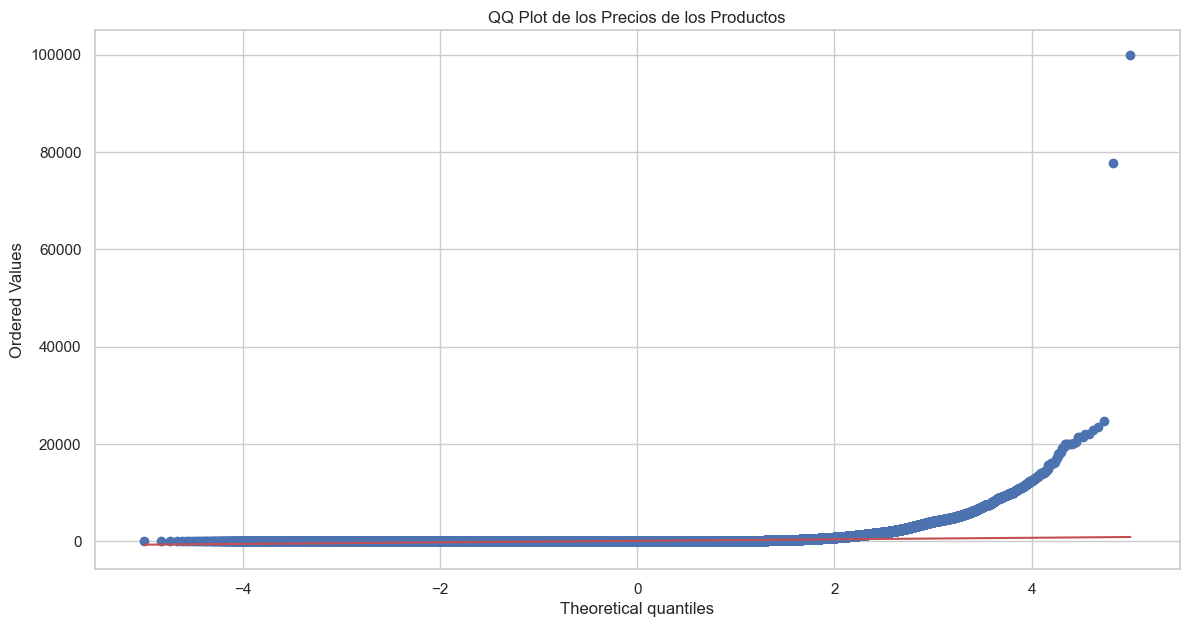

In [14]:
# Parte 3: Investigando la interacción entre precios y calificaciones de productos

from scipy import stats

# Coeficientes de correlación
correlation = df['price'].corr(df['stars'])
print(f'Coeficiente de correlación entre precio y calificación: {correlation}')

# Visualizaciones
# Gráfico de dispersión
plt.figure(figsize=(14, 7))
sns.scatterplot(x='stars', y='price', data=df)
plt.title('Relación entre Calificación y Precio')
plt.xlabel('Calificación')
plt.ylabel('Precio')
plt.show()

# Mapa de calor de correlación (solo columnas numéricas)
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

# QQ plot para verificar la normalidad de los precios
plt.figure(figsize=(14, 7))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot de los Precios de los Productos')
plt.show()
